In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats

# 设置中文字体
rcParams['font.sans-serif'] = ['SimHei']  # 或者 'Microsoft YaHei'
rcParams['axes.unicode_minus'] = False  # 解决负号 '-' 显示问题

# 读取数据
data = pd.read_csv("data_aggregated.csv", encoding="utf-8")
data.head()


,Index,24-Nov,24-Oct,24-Sep,24-Aug,24-Jul,24-Jun,24-May,24-Apr,24-Mar,...,19-Mar,18-Nov,18-Oct,18-Sep,18-Aug,18-Jul,18-Jun,18-May,18-Apr,18-Mar
0,Online,16675.200000,14704.100000,12575.500000,12568.400000,12792.600000,13322.600000,13558.500000,11028.50000,11546.400000,...,8395.900000,10149.500000,7754.500000,7589.100000,7332.800000,7052.700000,8119.400000,6899.100000,6473.000000,7047.20000
1,Total,43763.000000,45396.400000,41112.300000,38725.800000,37757.400000,40731.600000,39211.000000,35699.10000,39019.900000,...,31725.700000,35259.700000,35534.400000,32005.400000,31542.300000,30733.700000,30841.600000,30359.100000,28541.900000,29193.60000
2,Offline,27087.800000,30692.300000,28536.800000,26157.400000,24964.800000,27409.000000,25652.500000,24670.60000,27473.500000,...,23329.800000,25110.200000,27779.900000,24416.300000,24209.500000,23681.000000,22722.200000,23460.000000,22068.900000,22146.40000
3,Online/Offline,0.615598,0.479081,0.440677,0.480491,0.512425,0.486067,0.528545,0.44703,0.420274,...,0.359879,0.404198,0.279141,0.310821,0.302889,0.297821,0.357333,0.294079,0.293309,0.31821


### 7.1 描述统计7.1.1
提供数据的基本概况，展示电子商务与传统零售的销售额分布、趋势和变化模式。用折线图、柱形图等体现数
据的整体分布、集中趋势（如均值、众数、中位数）以及波动情况（如方差、标准差）。

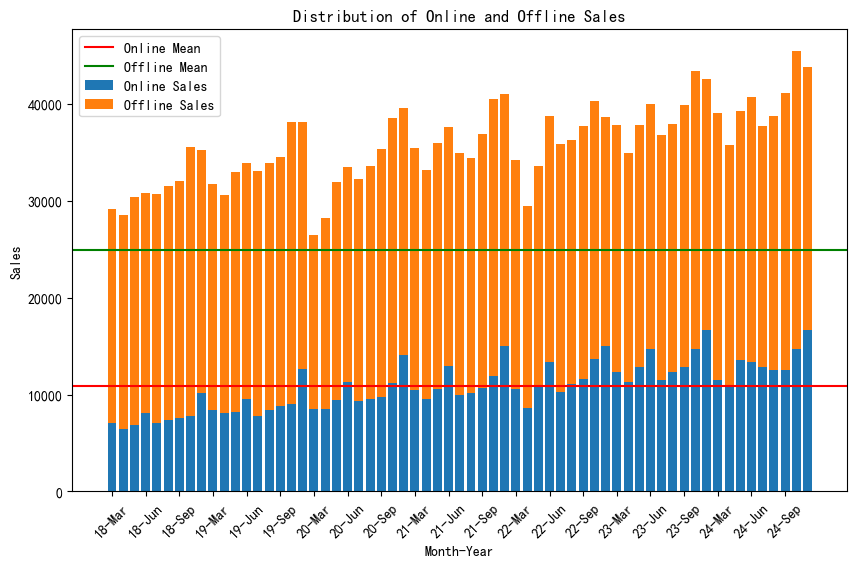

Online Sales:
Mean: 10873.685714285713
Median: 10644.2
Mode: 6473.0
Offline Sales:
Mean: 24951.412698412696
Median: 25186.8
Mode: 17993.1
Online Sales:
Variance: 6354057.473179724
Standard Deviation: 2520.725584664012
Offline Sales:
Variance: 4780158.649190988
Standard Deviation: 2186.357392831965


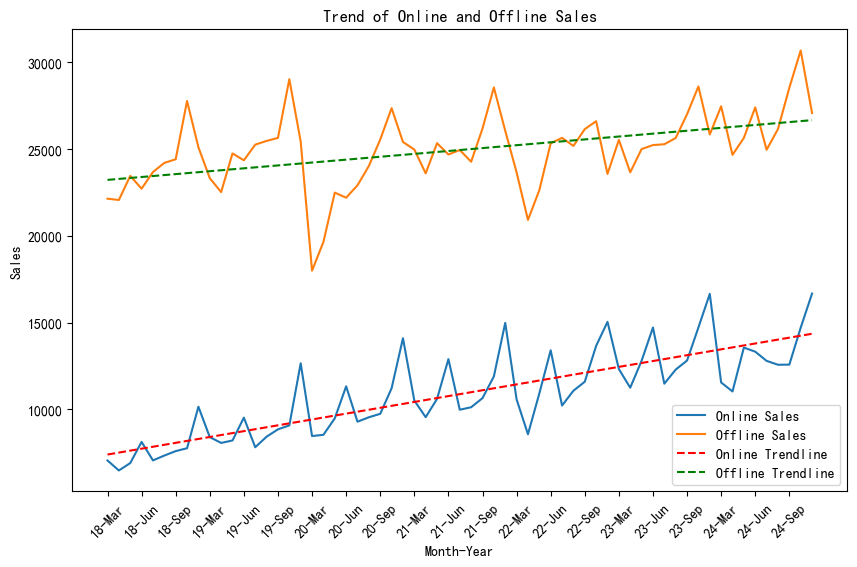

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress


# 假设data是你的原始数据
# 这里省略了data的定义

# 数据预处理：转置数据
data_filtered = data.set_index("Index").T.reset_index()

# 设置列名
data_filtered.columns = ["Month-Year"] + list(data_filtered.columns[1:])

# 提取年份
data_filtered["Year"] = data_filtered["Month-Year"].str.extract(r"(\d{2,4})").astype(int)

# 提取月份
data_filtered["Month"] = data_filtered["Month-Year"].str.extract(r"([A-Za-z]+)").iloc[:, 0]

# 1. 电子商务与传统零售销售额分布
online_sales = data_filtered["Online"]
offline_sales = data_filtered["Offline"]

# 绘制柱形图展示销售额分布
plt.figure(figsize=(10, 6))
plt.bar(data_filtered["Month-Year"][::-1], online_sales[::-1], label="Online Sales")
plt.bar(data_filtered["Month-Year"][::-1], offline_sales[::-1], bottom=online_sales[::-1], label="Offline Sales")

# 计算并绘制在线销售平均线
online_mean = online_sales.mean()
plt.axhline(y=online_mean, color='r', linestyle='-', label='Online Mean')

# 计算并绘制离线销售平均线
offline_mean = offline_sales.mean()
plt.axhline(y=offline_mean, color='g', linestyle='-', label='Offline Mean')

plt.xlabel("Month-Year")
plt.ylabel("Sales")
plt.title("Distribution of Online and Offline Sales")
plt.legend()

# 设置横坐标标签间隔
ticks = plt.xticks()[0]
new_ticks = ticks[::3]
plt.xticks(new_ticks)

plt.xticks(rotation=45)
plt.show()


# 2. 集中趋势
print("Online Sales:")
print("Mean:", online_sales.mean())
print("Median:", online_sales.median())
print("Mode:", online_sales.mode()[0])

print("Offline Sales:")
print("Mean:", offline_sales.mean())
print("Median:", offline_sales.median())
print("Mode:", offline_sales.mode()[0])


# 3. 波动情况
print("Online Sales:")
print("Variance:", online_sales.var())
print("Standard Deviation:", online_sales.std())

print("Offline Sales:")
print("Variance:", offline_sales.var())
print("Standard Deviation:", offline_sales.std())


# 4. 趋势（以折线图展示销售额随时间变化）
plt.figure(figsize=(10, 6))
plt.plot(data_filtered["Month-Year"][::-1], online_sales[::-1], label="Online Sales")
plt.plot(data_filtered["Month-Year"][::-1], offline_sales[::-1], label="Offline Sales")

# 计算在线销售趋势线
x = np.arange(len(online_sales))
slope, intercept, r_value, p_value, std_err = linregress(x, online_sales)
trendline_online = slope * x + intercept
plt.plot(data_filtered["Month-Year"][::-1], trendline_online[::-1], 'r--', label='Online Trendline')

# 计算离线销售趋势线
x = np.arange(len(offline_sales))
slope, intercept, r_value, p_value, std_err = linregress(x, offline_sales)
trendline_offline = slope * x + intercept
plt.plot(data_filtered["Month-Year"][::-1], trendline_offline[::-1], 'g--', label='Offline Trendline')

plt.xlabel("Month-Year")
plt.ylabel("Sales")
plt.title("Trend of Online and Offline Sales")
plt.legend()

# 设置横坐标标签间隔
ticks = plt.xticks()[0]
new_ticks = ticks[::3]
plt.xticks(new_ticks)

plt.xticks(rotation=45)
plt.show()

### 7.1.2 电子商务与传统零售比值的分布及变化趋势

#### 综合两张图的分析：
虽然在比值分布中，0.40 - 0.45 的比值出现频率最高，但从时间趋势来看，比值在逐年上升，未来可能会有更多数据出现在 0.50 及以上的区间。
这表明随着时间的推移，电子商务销售额相对传统零售销售额在不断增加。

  Month-Year   Online    Total  Offline  Online/Offline  Year Month
0     24-Nov  16675.2  43763.0  27087.8        0.615598    24   Nov
1     24-Oct  14704.1  45396.4  30692.3        0.479081    24   Oct
2     24-Sep  12575.5  41112.3  28536.8        0.440677    24   Sep
3     24-Aug  12568.4  38725.8  26157.4        0.480491    24   Aug
4     24-Jul  12792.6  37757.4  24964.8        0.512425    24   Jul

处理后的数据:
   Year Month          Metric     Ratio
0    24   Nov  Online/Offline  0.615598
1    24   Oct  Online/Offline  0.479081
2    24   Sep  Online/Offline  0.440677
3    24   Aug  Online/Offline  0.480491
4    24   Jul  Online/Offline  0.512425

数据的基本统计概况:
count    63.000000
mean      0.434650
std       0.087429
min       0.279141
25%       0.385937
50%       0.421329
75%       0.484232
max       0.644351
Name: Ratio, dtype: float64

均值: 0.43
标准差: 0.09
方差: 0.01
众数: 0.28
中位数: 0.42


D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


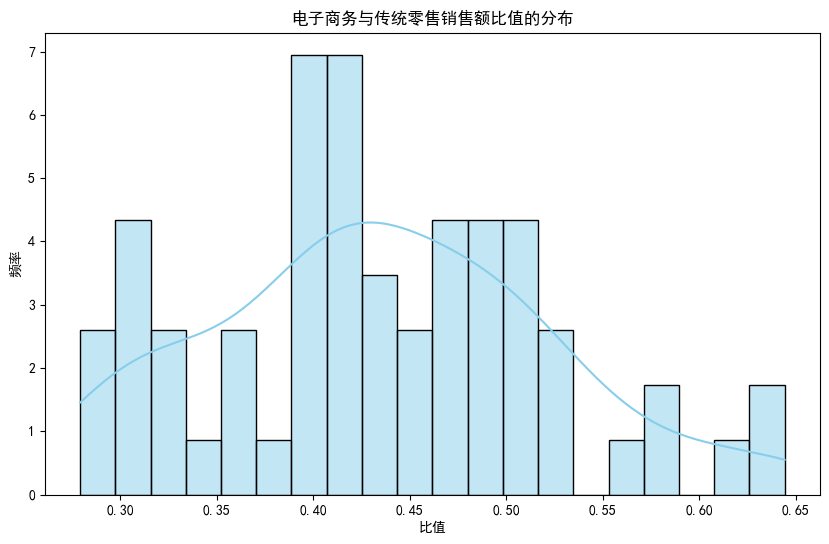

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


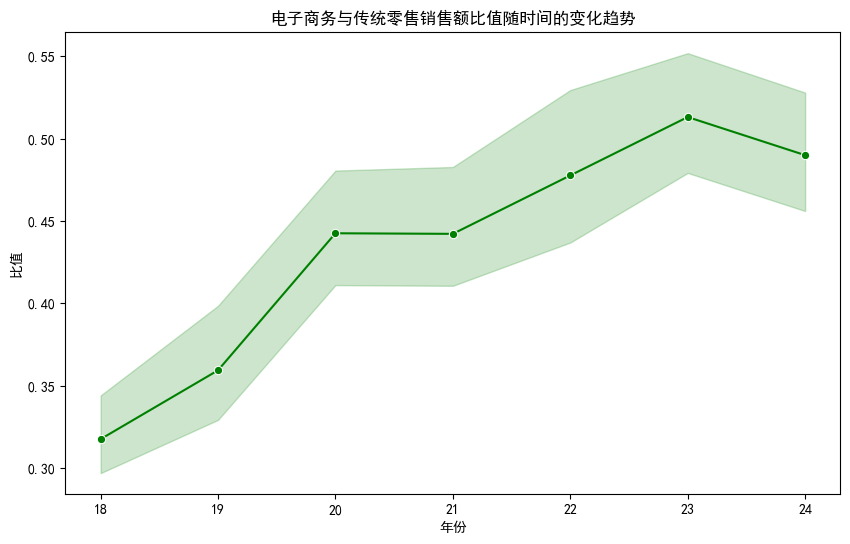

In [3]:
# 数据预处理：转置数据
data_filtered = data.set_index("Index").T.reset_index()

# 设置列名
data_filtered.columns = ["Month-Year"] + list(data_filtered.columns[1:])

# 提取年份
data_filtered["Year"] = data_filtered["Month-Year"].str.extract(r"(\d{2,4})").astype(int)

# 提取月份
data_filtered["Month"] = data_filtered["Month-Year"].str.extract(r"([A-Za-z]+)").iloc[:, 0]

print(data_filtered.head())

# 转换为长格式数据
long_data = data_filtered.melt(id_vars=["Year", "Month"], value_vars=["Online/Offline"], var_name="Metric", value_name="Ratio")

# 转换数据类型
long_data["Ratio"] = pd.to_numeric(long_data["Ratio"], errors="coerce")

# 删除空值
long_data = long_data.dropna()

# 输出处理后的数据
print("\n处理后的数据:")
print(long_data.head())

# 1. 数据的基本概况

# 描述统计：展示销售额比值的集中趋势和波动情况
summary = long_data["Ratio"].describe()
print("\n数据的基本统计概况:")
print(summary)

# 计算均值、标准差、方差等
mean_ratio = long_data["Ratio"].mean()
std_ratio = long_data["Ratio"].std()
variance_ratio = long_data["Ratio"].var()

print(f"\n均值: {mean_ratio:.2f}")
print(f"标准差: {std_ratio:.2f}")
print(f"方差: {variance_ratio:.2f}")

# 计算众数和中位数
mode_ratio = long_data["Ratio"].mode()[0]
median_ratio = long_data["Ratio"].median()

print(f"众数: {mode_ratio:.2f}")
print(f"中位数: {median_ratio:.2f}")

# 2. 可视化数据分布和趋势

# 绘制比值的分布（柱形图）
plt.figure(figsize=(10, 6))
sns.histplot(long_data['Ratio'], bins=20, kde=True, color='skyblue', stat='density')
plt.title('电子商务与传统零售销售额比值的分布')
plt.xlabel('比值')
plt.ylabel('频率')
plt.show()

# 绘制比值随时间的变化趋势（折线图）
plt.figure(figsize=(10, 6))
sns.lineplot(x="Year", y="Ratio", data=long_data, marker='o', color='green')
plt.title('电子商务与传统零售销售额比值随时间的变化趋势')
plt.xlabel('年份')
plt.ylabel('比值')
plt.show()

### 7.2 t 检验（t-test）
t 检验用于比较两个不同时间点（电商发展前后）传统零售与电商销售额比值的差异，检验比值随时间的变化是否显著。
– 零假设：电商发展前后，传统零售与电商销售额的比值没有显著变化。
– 备择假设：电商发展前后，传统零售与电商销售额的比值有显著变化
1. 选择电刺激速发点展前后：（2018-2019年与 2020-2024 年）的传统零售与电商的销售额数据，计算传统零售与电商的销售额比值（考虑到数据一致性，选取3月-11月的数据）
2019 年：据《全国服装电商产业发展白皮书 (2023)》，服装电商行业自 2019 年起进入创新融合阶段，以直播电商为代表的新型电商爆发式增长，电商行业创新融合，重新分工 .
2020 年 - 2022 年：疫情影响下，消费者线上消费习惯加速养成，电商渗透率进一步提升，推动电商行业快速发展，直播电商、社交电商、即时零售等新电商模式不断涌现并壮大，电商与各产业的融合也不断深化，如电商与农业、制造业等的结合更加紧密，推动了产业数字化转型。

In [4]:
import pandas as pd
import scipy.stats as stats

# 提取2018年-2021年和2022年-2024年的相关数据
data_2018_2021 = data_filtered[(data_filtered['Year'] >= 18) & (data_filtered['Year'] <= 21) ]
data_2022_2024 = data_filtered[(data_filtered['Year'] >= 22) & (data_filtered['Year'] <= 24)  ]

# 计算传统零售与电商销售额的比值
ratio_2018_2021 = data_2018_2021['Offline'] / data_2018_2021['Online']
ratio_2022_2024 = data_2022_2024['Offline'] / data_2022_2024['Online']

# 进行t检验
t_statistic, p_value = stats.ttest_ind(ratio_2018_2021, ratio_2022_2024)

print("t统计量:", t_statistic)
print("p值:", p_value)

# 根据p值判断是否拒绝零假设
alpha = 0.05
if p_value < alpha:
    print("拒绝零假设，电商发展前后，传统零售与电商销售额的比值有显著变化。")
else:
    print("不拒绝零假设，电商发展前后，传统零售与电商销售额的比值没有显著变化。")

t统计量: 5.7634075123260144
p值: 2.9083346798913214e-07
拒绝零假设，电商发展前后，传统零售与电商销售额的比值有显著变化。


### 7.3 卡方检验 线上线下销售比在不同季度的分布不存在显著差异

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 将Month列转换为日期时间格式，然后提取月份数字
long_data['Month'] = pd.to_datetime(long_data['Month'], format='%b').dt.month

# 筛选出2019 - 2023年的数据
filtered_data =long_data[(long_data['Year'] >= 19) & (long_data['Year'] <= 23)]


# 定义季度划分函数
def assign_quarter(row):
    year = row['Year']
    month = row['Month']
    if (month >= 1) & (month <= 3):
        return f"{year}Q1"
    elif (month >= 4) & (month <= 6):
        return f"{year}Q2"
    elif (month >= 7) & (month <= 9):
        return f"{year}Q3"
    else:
        return f"{year}Q4"

# 添加季度列
filtered_data['Quarter'] = filtered_data.apply(assign_quarter, axis=1)

# 创建列联表，以季度和线上线下销售比是否大于中位数为分类依据
median_ratio = filtered_data['Ratio'].median()
filtered_data['Ratio_Above_Median'] = filtered_data['Ratio'].apply(lambda x: 'Above' if x > median_ratio else 'Below')
contingency_table = pd.crosstab(filtered_data['Quarter'], filtered_data['Ratio_Above_Median'])

# 进行卡方检验
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 输出结果
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

alpha = 0.05
if p < alpha:
    print("结论: 线上线下销售比在不同季度的分布存在显著差异（拒绝原假设）")
else:
    print("结论: 线上线下销售比在不同季度的分布不存在显著差异（未拒绝原假设）")

Chi-Square Statistic: 28.32509881422925
P-Value: 0.0773687463967328
结论: 线上线下销售比在不同季度的分布不存在显著差异（未拒绝原假设）


C:\Users\吴雅琪\AppData\Local\Temp\ipykernel_19728\3417500388.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Quarter'] = filtered_data.apply(assign_quarter, axis=1)
C:\Users\吴雅琪\AppData\Local\Temp\ipykernel_19728\3417500388.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Ratio_Above_Median'] = filtered_data['Ratio'].apply(lambda x: 'Above' if x > median_ratio else 'Below')


In [6]:
data_filtered.head()

,Month-Year,Online,Total,Offline,Online/Offline,Year,Month
0,24-Nov,16675.2,43763.0,27087.8,0.615598,24,Nov
1,24-Oct,14704.1,45396.4,30692.3,0.479081,24,Oct
2,24-Sep,12575.5,41112.3,28536.8,0.440677,24,Sep
3,24-Aug,12568.4,38725.8,26157.4,0.480491,24,Aug
4,24-Jul,12792.6,37757.4,24964.8,0.512425,24,Jul


### 7.3 卡方检验 电商与传统零售销售额变化率之间没有显著的关联

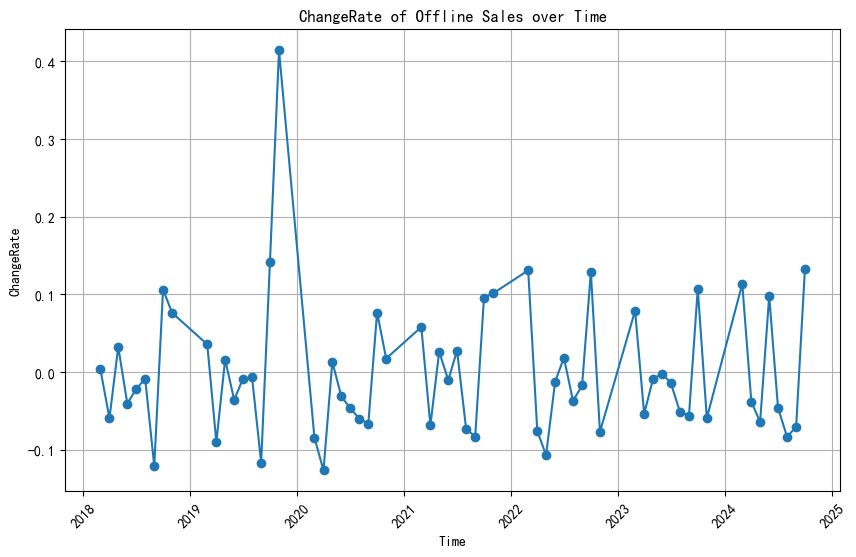

ChangeRate的平均值: 0.00035909904275667704
卡方值: 0.62119708994709
p值: 0.43060278747149705
自由度: 1
期望频率: [[2.15384615 4.84615385]
 [1.84615385 4.15384615]]
不能拒绝零假设，电商与传统零售销售额变化率之间没有显著的关联。


In [7]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_chisquare
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 复制data_filtered数据集到新的data_trend用于后续处理和存储相关数据
data_trend = data_filtered.copy()

# 计算销售额变化率（这里假设按照Offline列来计算，和你之前代码逻辑保持一致，如果需要修改可按需调整）
data_trend["ChangeRate"] = data_trend["Offline"].pct_change()

# 将'Month-Year'列转换为日期时间类型，便于后续按时间顺序绘图（假设格式如'24-Nov'，你可根据实际调整格式参数）
data_trend["Month-Year"] = pd.to_datetime(data_trend["Month-Year"], format="%y-%b")

# 绘制ChangeRate随时间的变化图
plt.figure(figsize=(10, 6))
plt.plot(data_trend["Month-Year"], data_trend["ChangeRate"], marker='o', linestyle='-')
plt.xlabel("Time")
plt.ylabel("ChangeRate")
plt.title("ChangeRate of Offline Sales over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 计算ChangeRate的平均值
average_change_rate = data_trend["ChangeRate"].mean()
print("ChangeRate的平均值:", average_change_rate)

# 根据2020年划分电商发展阶段（同样保持你之前的划分逻辑，如果需要修改可改条件）
data_trend["Stage"] = data_trend["Year"].apply(lambda x: "Before" if x <= 20 else "After")

# 构建列联表，根据销售额变化率分类，只保留Increase和Decrease两类
def classify_change_rate(change_rate):
    if change_rate > 0.1:
        return "Increase"
    elif change_rate <= -0.1:
        return "Decrease"
    else:
        return None  # 对于处于 -0.1到0.1之间的数据，返回None，后续会被排除

data_trend["ChangeCategory"] = data_trend["ChangeRate"].apply(classify_change_rate)

# 去除ChangeCategory列中为None的数据行，只保留Increase和Decrease的数据
data_trend = data_trend.dropna(subset=["ChangeCategory"])

# 构建列联表
contingency_table = pd.crosstab(data_trend["Stage"], data_trend["ChangeCategory"])

# 进行卡方检验
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("卡方值:", chi2)
print("p值:", p)
print("自由度:", dof)
print("期望频率:", expected)

if p < 0.05:
    print("拒绝零假设，电商与传统零售销售额变化率之间存在显著的关联。")
else:
    print("不能拒绝零假设，电商与传统零售销售额变化率之间没有显著的关联。")

In [25]:
!pip install --upgrade statsmodels

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 1.4 MB/s eta 0:00:08
    --------------------------------------- 0.1/9.9 MB 1.6 MB/s eta 0:00:07
   - -------------------------------------- 0.3/9.9 MB 2.2 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/9.9 MB 3.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.1/9.9 MB 5.0 MB/s eta 0:00:02
   ------ --------------------------------- 1.6/9.9 MB 6.2 MB/s eta 0:00:02
   --------- ------------------------------ 2.3/9.9 MB 7.3 MB/s eta 0:00:02
   --------- ------------------------------ 2.3/9.9 MB 7.5 MB/s eta 0:00:02
   --------- ------------------------------ 2.3/9.9 MB 7.5 MB/s eta 0:00:02
   --------- ------------------------------ 2.3/9.9 MB 7.5 MB/s eta 0:00:02
   --------- ------------------------------ 2.3/9.9 MB 7.5 MB/s eta 0:00:02
   --------- ----